In [1]:
# https://media4.obspm.fr/public/ressources_lu/pages_effet-de-maree/limite-roche-sexercer.html

import pandas as pd
import numpy as np

planet = pd.read_csv("planete.csv")
#print(planet)
#print(planet.info())

bodies = pd.read_csv("saturn_bodies.csv")
#print(bodies)
#print(bodies.info())

rings = pd.read_csv("saturn_rings.csv")
#print(rings)
#print(rings.info())
planet.set_index('Objet', inplace=True)
bodies.set_index('Satellite', inplace=True)
rings.set_index('Rings', inplace=True)

In [2]:
planet

,Masse,Rayon,Masse volumique
Objet,,,
Soleil,2.000000e+30,700000000.0,1400
Terre,6.000000e+24,6400000.0,5450
Lune,7.200000e+22,1700000.0,3500
Saturne,5.700000e+26,60000000.0,630
Comète,NaN,NaN,200


In [3]:
bodies
#bodies.info()

,Distance,Rayon,Masse
Satellite,,,
Mimas,186000,196,3.800000e+19
Encelade,238000,260,8.400000e+19
Téthys,295000,530,7.550000e+20
Dioné,377000,560,1.050000e+21


In [4]:
rings

,Rayon interne,Rayon externe,Largeur
Rings,,,
Anneau D,60000,72600,12600
Division Guerin,72600,73800,1200
Anneau C,73800,91800,18000
Division Maxwell,91800,92300,500
Anneau B,92300,115800,23500
Division Cassini,115800,120600,4800


In [34]:
G = 6.6743e-11
#print(G)

def pulsation(M, D):
    return np.sqrt(G*M/D**3)

def force_g(M, m, D, r):
    return G*M*m/(D-r**2), G*M*m/(D+r**2)

def inertie(m, D, r):
    p = pulsation(m,D)
    return m*p**2*(D-r), m*p**2*(D+r)

def delta(M, m, D, r):    #question 4
    return -4*G*M*m*r/D**3

def cohesion(m,r):   # question 5
    return -G*m**2/(4*r**2)

#limite de Roche quand delta = cohesion
def lim_roche(R, rho_M, rho_m):
    #rho_M = M/(4/3*np.pi*R**3)
    #rho_m = m/(4/3*np.pi*r**3)
    factor = np.sqrt(16)
    return (16*R**3*rho_M/rho_m)**(1/3) # même masses volumiques, d_R = 2.9R, observé 2.45R

#limite de Roche quand delta = cohesion
def lim_roche_fluide(R, rho_M, rho_m):
    #rho_M = M/(4/3*np.pi*R**3)
    #rho_m = m/(4/3*np.pi*r**3)
    factor = 1.26
    return factor*R*(rho_M/rho_m)**(1/3) 

In [6]:
print('Solar planets')
print(planet)

Solar planets
                Masse        Rayon  Masse volumique
Objet                                              
Soleil   2.000000e+30  700000000.0             1400
Terre    6.000000e+24    6400000.0             5450
Lune     7.200000e+22    1700000.0             3500
Saturne  5.700000e+26   60000000.0              630
Comète            NaN          NaN              200


In [7]:
print('Saturn bodies')
print(bodies)

Saturn bodies
           Distance  Rayon         Masse
Satellite                               
Mimas        186000    196  3.800000e+19
Encelade     238000    260  8.400000e+19
Téthys       295000    530  7.550000e+20
Dioné        377000    560  1.050000e+21


In [8]:
print('Saturn rings')
print(rings)

Saturn rings
                  Rayon interne  Rayon externe  Largeur
Rings                                                  
Anneau D                  60000          72600    12600
Division Guerin           72600          73800     1200
Anneau C                  73800          91800    18000
Division Maxwell          91800          92300      500
Anneau B                  92300         115800    23500
Division Cassini         115800         120600     4800


In [35]:
M = planet.loc['Terre','Masse']
R = planet.loc['Terre','Rayon']
rho_M = planet.loc['Terre','Masse volumique']
m = planet.loc['Lune','Masse']
r = planet.loc['Lune','Rayon']
rho_m = planet.loc['Lune','Masse volumique']
print(planet)
print(M, R, rho_M)
print(m, r, rho_m)

                Masse        Rayon  Masse volumique
Objet                                              
Soleil   2.000000e+30  700000000.0             1400
Terre    6.000000e+24    6400000.0             5450
Lune     7.200000e+22    1700000.0             3500
Saturne  5.700000e+26   60000000.0              630
Comète            NaN          NaN              200
6e+24 6400000.0 5450
7.2e+22 1700000.0 3500


In [36]:
v_M = 4/3*np.pi*R**3
ro_M = M/v_M
print(ro_M)

v_m = 4/3*np.pi*r**3
ro_m = m/v_m
print(ro_m)

print(lim_roche(R, ro_M, ro_m)/1000)

5464.151336010201
3498.622807637838
18710.921077069535


In [56]:
limite = lim_roche(R, rho_M, rho_m)
print('Limite roche Terre - Lune:', '%5.3f km' % (limite/1000))

Limite roche Terre - Lune: 18692.302 km


In [57]:
D=((16*M*r**3)/m)**(1/3)
print(D/1000)

18710.92107706953


In [58]:
print(cohesion(m, r))
print(delta(M, m, D, r))

-2.993042491349481e+22
-2.9930424913494893e+22


18692301.93432642
Limite roche Terre - Lune: 18692301.934 km
-2.993042491349481e+22


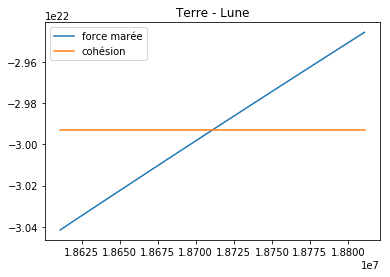

In [61]:
import matplotlib.pyplot as plt
print(limite)
x = np.linspace(D-1e5,D+1e5,1000)
y = delta(M, m, x, r)
z = cohesion(m,r)   #-G*m**2/(4*r**2)
print('Limite roche Terre - Lune:', '%5.3f km' % limite)
print(z)
plt.title('Terre - Lune')
plt.plot(x,y, label='force marée')
plt.plot(x,[z]*1000, label='cohésion')
plt.legend()
plt.show()

In [93]:
print(planet.loc['Saturne'])
#print(bodies)
M = planet.loc['Saturne','Masse']
R = planet.loc['Saturne','Rayon']
rho_M = planet.loc['Saturne','Masse volumique']
m = bodies.loc['Mimas','Masse']
D = bodies.loc['Mimas','Distance']
r = bodies.loc['Mimas','Rayon']*1000
v = 4/3*r**3*np.pi
rho_m = m/v
print('Saturne :', M, R, rho_M)
print('Mimas :', m, r, rho_m )

for k in bodies.index:
    bodies.loc[k,'Masse volumique']=bodies.loc[k,'Masse']/(4/3*np.pi*(bodies.loc[k,'Rayon']*1000)**3)

print(bodies)
    

Masse              5.700000e+26
Rayon              6.000000e+07
Masse volumique    6.300000e+02
Name: Saturne, dtype: float64
Saturne : 5.7e+26 60000000.0 630
Mimas : 3.8e+19 196000 1204.8327753845704
           Distance  Rayon         Masse  Masse volumique
Satellite                                                
Mimas        186000    196  3.800000e+19      1204.832775
Encelade     238000    260  8.400000e+19      1140.960562
Téthys       295000    530  7.550000e+20      1210.683806
Dioné        377000    560  1.050000e+21      1427.370145


In [83]:
print('Pulsation Mimas', pulsation(M,D))
print('Force gravitationnelle Mimas', force_g(M,m,D,r))
print('Inertie Mimas', inertie(m,D,r))
print('delta Mimas', delta(M, m, D, r))    
print('Cohesion Mimas', cohesion(m,r))

Pulsation Mimas 2.431480961204739
Force gravitationnelle Mimas (-3.763172583040932e+25, 3.763136142666531e+25)
Inertie Mimas (-1.497731915057618e+17, 5.7213359155201e+18)
delta Mimas -1.7613327321077583e+26
Cohesion Mimas -6.271923937942524e+17


In [84]:
#rho_m = rho_M
limite = lim_roche(R, rho_M, rho_m)
print('Limite roche Saturne - Mimas:', '%5.3f km' % (limite/1000))

D=((16*M*r**3)/m)**(1/3)
print(D/1000)

Limite roche Saturne - Mimas: 121804.267 km
121803.51423339115


In [77]:
print('Saturn rings (km)')

for k in rings.index:
    name = k  #rings.index[0]
    #print(rings.loc[name])
    ri = rings.loc[name,'Rayon interne']
    re = rings.loc[name,'Rayon externe']
    lg = rings.loc[name,'Largeur']
    print('{0:16s} {1:10d} {2:10d} {3:10d}'.format(name,ri,re,lg))

Saturn rings (km)
Anneau D              60000      72600      12600
Division Guerin       72600      73800       1200
Anneau C              73800      91800      18000
Division Maxwell      91800      92300        500
Anneau B              92300     115800      23500
Division Cassini     115800     120600       4800


Limite roche Saturne - Mimas: 121804267.207 km
-6.271923937942524e+17


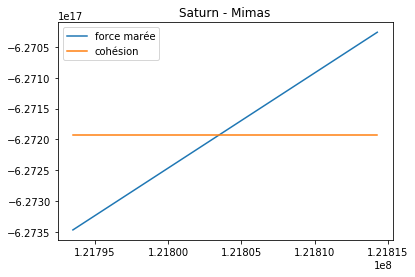

In [87]:
x = np.linspace(D-1e4,limite+1e4,1000)
y = delta(M, m, x, r)
z = cohesion(m,r) 
print('Limite roche Saturne - Mimas:', '%5.3f km' % limite)
print(z)
plt.title('Saturn - Mimas')
plt.plot(x,y, label='force marée')
plt.plot(x,[z]*1000, label='cohésion')
plt.legend()
plt.show()

In [88]:
bodies.index

Index(['Mimas', 'Encelade', 'Téthys', 'Dioné'], dtype='object', name='Satellite')